<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/02_data/06_project_data_processing/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Project 1 <center>

# Dataset Exploration


For this project you will be given a dataset and an associated problem. Over the course of the day, you will explore the dataset and train the best model you can in order to solve the problem. At the end of the day, you will give a short presentation about your model and solution.

### Deliverables

1. A **copy of this Colab notebook** containing your code and responses to the ethical considerations below.
1. At the end of the day, we will ask you and your group to stand in front of the class and give a brief **presentation about what you have done**. 

## Team

Please enter your team members' names in the placeholders in this text area:

*   *Wren Priest*
*   *Jose Martinez*
*   *Maria Quintero-Pena*




# Exercises

## Exercise 1: Coding

[Kaggle](http://www.kaggle.com) hosts a [dataset containing US airline on-time statistics and delay data](https://www.kaggle.com/giovamata/airlinedelaycauses) from the [US Department of Transportation's Bureau of Transportation Statistics (BTS)](https://www.bts.gov/). In this project, we will **use flight statistics data to gain insights into US airports' and airlines' flights in 2008.**

You are free to use any toolkit we've covered in class to solve the problem (e.g. Pandas, Matplotlib, Seaborn).

Demonstrations of competency:
1. Get the data into a Python object.
1. Inspect the data for each column's data type and summary statistics.
1. Explore the data programmatically and visually.
1. Produce an answer and visualization, where applicable, for at least three questions from the list below, and discuss any relevant insights. Feel free to generate and answer some of your own questions. 

  * Which U.S. airport is the busiest airport? You can decide how you'd like to measure "business" (e.g., annually, monthly, daily).
  * Of the 2008 flights that are *actually delayed*, think about:
    * Which 10 U.S. airlines have the most delays?
    * Which 10 U.S. airlines have the longest average delay time?
    * Which 10 U.S. airports have the most delays?
    * Which 10 U.S. airports have the longest average delay time?
  * More analysis:
    * Are there patterns on how flight delays are distributed across different hours of the day?
    * How about across months or seasons? Can you think of any reasons for these seasonal delays?
    * If you look at average delay time or number of delays by airport, does the data show linearity? Does any subset of the data show linearity?
    * Add reason for delay to your delay analysis above.
    * Examine flight frequencies, delays, time of day or year, etc. for a specific airport, airline or origin-arrival airport pair.

### Student Solution

#### **Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#### **1. Get the data into a Python object.**

In [ ]:
# Use Kaggle API to download airlinedelaycauses.zip
! cp ~/.kaggle/kaggle.json .
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle datasets download giovamata/airlinedelaycauses
! ls

kaggle.json
Done
401 - Unauthorized
airlinedelaycauses.zip	sample_data


In [ ]:
# unzip airlinedelaycauses.zip
zf = zipfile.ZipFile('airlinedelaycauses.zip')

# read into df
df = pd.read_csv(zf.open('DelayedFlights.csv'))
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### **2. Inspect the data for each column's data type and summary statistics.**

In [ ]:
# print datatype of each column
print(df.dtypes)

# describe
df.describe()

Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


#### **3. Explore the data programmatically and visually.**

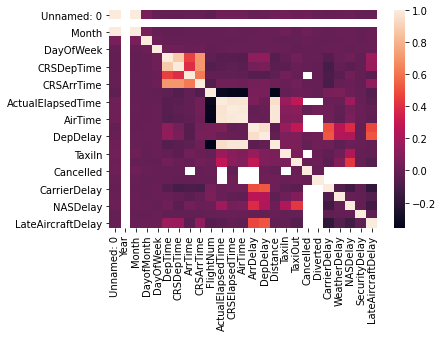

In [ ]:
sns.heatmap(df.corr())

*Series used to find the busiest airport*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


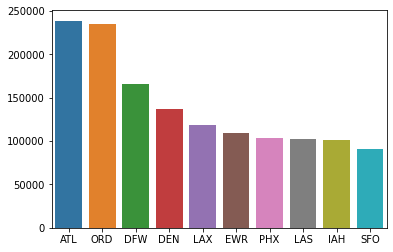

In [ ]:

#Using origin and destination to determine how busy an airport is
origin = df['Origin'].value_counts()
dest= df['Dest'].value_counts()


#combining origin and destination into one series
origin_plus_dest = df.Origin.append(df.Dest)
origin_dest_count = origin_plus_dest.value_counts()

#x-axis
x = origin_dest_count.head(10).index[0:10]#top 10 busiest aiports

#y-axis
y =origin_dest_count.values[0:10]#amount of origin + desination flights

#Adding Seaborn graph
sns.barplot(x,y)

*Answering Question II*

In [ ]:
carrier_delay = df.groupby('UniqueCarrier').agg(
    count_ArrDelay = ('ArrDelay', lambda x: x[x>0].count()),
    mean_ArrDelay = ('ArrDelay', lambda x: x[x>0].mean())
)


carrier_delay.sort_values('count_ArrDelay', ascending=False).head(10)


,count_ArrDelay,mean_ArrDelay
UniqueCarrier,,
WN,324717.0,35.752200
AA,172197.0,52.308693
MQ,130647.0,49.323276
UA,123989.0,55.247086
OO,121942.0,49.362172
DL,100923.0,45.786501
XE,94313.0,55.424629
CO,83646.0,49.729324
US,83262.0,44.175278


*Answering Question III*

In [ ]:
carrier_delay.sort_values('mean_ArrDelay', ascending=False).head(10)

,count_ArrDelay,mean_ArrDelay
UniqueCarrier,,
B6,48177.0,63.947859
YV,63289.0,58.563131
XE,94313.0,55.424629
UA,123989.0,55.247086
OH,49104.0,54.915261
AA,172197.0,52.308693
EV,75170.0,52.153146
9E,46896.0,52.097343
CO,83646.0,49.729324


*Answering Question IV*

In [ ]:
airport_delay = df.groupby('Origin').agg(
    count_DepDelay = ('DepDelay', lambda x: x[x>0].count()),
    mean_DepDelay = ('DepDelay', lambda x: x[x>0].mean())
)

airport_delay.sort_values('count_DepDelay', ascending=False).head(10)


,count_DepDelay,mean_DepDelay
Origin,,
ATL,131613.0,40.893240
ORD,125979.0,50.531168
DFW,95414.0,38.340610
DEN,74323.0,37.698868
LAX,58772.0,38.174998
IAH,56847.0,37.735219
PHX,55720.0,35.242067
LAS,53710.0,38.819643
EWR,52925.0,50.430099


*Answering Question V*

In [ ]:
airport_delay.sort_values('mean_DepDelay', ascending=False).head(10)

,count_DepDelay,mean_DepDelay
Origin,,
CMX,34.0,116.147059
PLN,21.0,93.761905
SPI,357.0,83.848739
ALO,31.0,82.225806
MQT,203.0,79.556650
ACY,29.0,79.310345
MOT,133.0,78.661654
HHH,183.0,76.530055
EGE,861.0,74.128920


#### **4. Questions and Answers**

 **1.) Which U.S. airport is the busiest airport?**


>Based on the code and visualizations done above,when consiering arrivals and departures as parameters for how busy an aiport is, the busiest aiport was ATL

**2.) Which 10 U.S. airlines have the most delays?**

>WN, AA, MQ, UA, OO, DL, XE, CO,and EV were the the 10 airlines that had the most delays


**3.) Which 10 U.S. airlines have the longest average delay time?**

> Based on the DataFrame created, the airline that had the longest average delay timme were B6, YV,XE,UA,OH,AA,EV,9E,CO, and OO


**4.) Which 10 U.S. airports have the most delays?**

> ATL, ORG, DFW, DEN, LAX, IAH, PHX, LAS, EWR and DTW





**5.) Which 10 U.S. airlines have the longest average delay time?**

>Based on the frame created, CMX, PLN, SPI, ALO,MQT, ACY, MOT, EGE, AND BGM .

## Exercise 2: Ethical Implications

Even the most basic of data manipulations has the potential to affect segments of the population in different ways. It is important to consider how your code might positively and negatively affect different types of users.

In this section of the project, you will reflect on the ethical implications of your analysis.

### Student Solution

**Positive Impact**

Your analysis is trying to solve a problem. Think about who will benefit if the problem is solved, and write a brief narrative about how the model will help.

>Travelers will benefit because they will be able to buy tickets from more efficient airlines. Airlines with not many delays or long delays will benefit because they will be able to sell more tickets. Smaller airports may be positively impacted assuming they have less delays.


**Negative Impact**

Solutions usually don't have a universal benefit. Think about who might be negatively impacted by your analysis. This person or persons might not be directly considered in the analysis, but they might be impacted indirectly.

>Airplane customers may be negatively impacted because the prices for airlines with less delays may rise. Airline companys will be negatively impacted if they have more delays or longer delays because they may have less sales. The busier airports may be negatively affected assuming they have more delays.

**Bias**

Data analysis can be biased for many reasons. The bias can come from the data itself (e.g. sampling, data collection methods, available sources), and from the interpretation of the analysis outcome.

Think of at least two ways that bias might have been introduced to your analysis and explain them below.

>Sampling bias can occur since larger airports tend to have more flights, therefore more delays. Larger airlines will also have a sampling bias since they will also have more flights. There may also be coverage bias since different regions also tend to have more frequent or less frequent activity that can affect airline delays. There may also be a Reporting bias due to Holidays which tend to have more flight and so can have more delays. Airlines in regions with harsh weather may be adversely affected since weather would affect the number of delays in that region. 

**Changing the Dataset to Mitigate Bias**

The most common way that an analysis is biased is when the dataset itself is biased. Look back at the input data that you used for your analysis. Think about how you might change something about the data to reduce bias in your model.

What changes could you make to make your dataset less biased? Consider the data that you have, how and where that data was collected, and what other sources of data might be used to reduce bias.

Write a summary of the changes that could be made to your input data.

>Since the data has potential bias sampling, we could adjust the models to account for the number and size of airports. Since the nnumber of delays will vary with time of year we adjust the data to account for seasonal delays. We could also add a column to take into account weather. 




**Changing the Analysis Questions to Mitigate Bias**

Are there any ways to reduce bias by changing the analysis itself? This could include modifying the choice of questions you ask, the approach you take to answer the questions, etc.

Write a brief summary of any changes that you could make to help reduce bias in your analysis.

>Since the analysis has potential bias sampling, we can weigh the data based on airport size. For example we could ask what percent of flights are delayed instead of the number of flights that are delayed to avoid penalizing airports that are really busy. We could also adjust the time and location that data is evaluated. 

**Mitigating Bias Downstream**

While analysis can point to suggestions, it is people who make decisions based on them. What processes and/or rules should be in place for people and systems interpreting and acting on the results of your analysis to reduce the bias? Describe these below.

>Since the analysis has potential bias reporting and sampling, we can implement newer data. Since the data is from 2008 it is not a good representation of recent flights. The data could also be organized depending on region and airline size to provide more individualized data.  


